In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url="https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [5]:
new_df=df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [6]:
new_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [7]:
df.fuel_efficiency_mpg

0       13.231729
1       13.688217
2       14.246341
3       16.912736
4       12.488369
          ...    
9699    15.101802
9700    17.962326
9701    17.186587
9702    15.331551
9703    14.884467
Name: fuel_efficiency_mpg, Length: 9704, dtype: float64

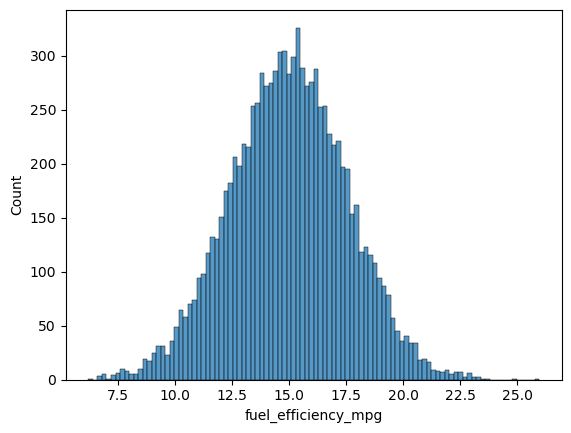

In [8]:
sns.histplot(df.fuel_efficiency_mpg, bins=100)
plt.show()

## Does it have a long tail?
   ### No , it does not have long tail distribution . it is bell shaped curve ie.. normal distribution 

In [9]:
new_df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Horsepower column has 708 values

In [10]:
new_df['horsepower'].median()

149.0

### median or 50% percentile of horsepower is 149.0

In [11]:
n = len(new_df)
n

9704

In [12]:
n_val = n_test = int(n * 0.2)

n_train = n - n_val - n_test

n_val, n_test, n_train

(1940, 1940, 5824)

In [13]:
ind = np.arange(n)

np.random.seed(42)
np.random.shuffle(ind)

In [14]:
df_train = new_df.iloc[ind[:n_train]]
df_val = new_df.iloc[ind[n_train:n_train + n_val]]
df_test = new_df.iloc[ind[n_train + n_val:]]

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5819,260,139.0,2606.972984,2009,16.964054
5820,280,132.0,4004.214323,2014,10.059094
5821,210,152.0,2500.175687,2020,17.593237
5822,250,154.0,2254.313245,2002,18.925748


In [17]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [18]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [19]:
df_train_zero=df_train.fillna(0)

In [20]:
df_train_zero

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [21]:
df_train_zero.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [22]:
X_train_zero = df_train_zero.values
X_train_zero

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]])

In [23]:
X_val_zero=df_val.fillna(0).values
X_val_zero

array([[ 180.        ,  112.        , 2772.13441008, 2020.        ],
       [ 260.        ,  138.        , 3014.06152983, 2022.        ],
       [ 140.        ,  181.        , 3652.18615117, 2016.        ],
       ...,
       [ 230.        ,  202.        , 3303.00068812, 2008.        ],
       [ 220.        ,  169.        , 3293.42025107, 2008.        ],
       [ 200.        ,  117.        , 2692.7812918 , 2004.        ]])

In [24]:
df_val

,engine_displacement,horsepower,vehicle_weight,model_year
0,180,112.0,2772.134410,2020
1,260,138.0,3014.061530,2022
2,140,181.0,3652.186151,2016
3,270,105.0,2753.040847,2023
4,170,224.0,4163.375137,2003
...,...,...,...,...
1935,290,205.0,3403.401496,2019
1936,200,159.0,2752.516039,2009
1937,230,202.0,3303.000688,2008
1938,220,169.0,3293.420251,2008


In [25]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [26]:
mean_hp = df_train['horsepower'].mean()
mean_hp

np.float64(149.54476367006487)

In [27]:
X_train_mean = df_train
X_val_mean = df_val

In [28]:
X_train_mean['horsepower'] = X_train_mean['horsepower'].fillna(mean_hp)
X_val_mean['horsepower'] = X_val_mean['horsepower'].fillna(mean_hp)

In [29]:
X_train_mean

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


## Model without regularization

In [30]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]



In [31]:
def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())

In [32]:
w0, w = train_linear_regression(X_train_zero, y_train)

In [33]:
y_pred = w0 + X_val_zero.dot(w)
y_pred

array([16.0373382 , 14.92522236, 11.86445895, ..., 13.69560868,
       13.62575126, 16.44936805])

In [34]:
rmse_zero = rmse(y_val, y_pred)
rmse_zero

np.float64(0.5173782638835324)

In [35]:
rmse_zero=round(rmse_zero,2)
rmse_zero

np.float64(0.52)

### RMSE value (missing value = 0) is 0.50

In [36]:
w0, w = train_linear_regression(X_train_mean.values, y_train)

In [37]:
y_pred = w0 + X_val_mean.values.dot(w)
y_pred

array([15.73837498, 14.80338305, 12.03624928, ..., 14.01482574,
       13.72161355, 16.1936294 ])

In [38]:
rmse_mean = round(rmse(y_val, y_pred), 2)
rmse_mean

np.float64(0.46)

### RMSE value (missing value = mean) is 0.46

In [39]:
rmse_zero, rmse_mean

(np.float64(0.52), np.float64(0.46))

### RMSE value where missing value filled with mean value is better

## Model with regularization

In [40]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X) + r * np.eye(X.shape[1])
    w_full = np.linalg.inv(XTX).dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [41]:
r= [0, 0.01, 0.1, 1, 5, 10, 100]

In [42]:
rmse_r = {}

for i in r:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=i)
    y_pred = w0 + X_val_zero.dot(w)
    rmse_r[i] = round(rmse(y_val, y_pred), 4)

rmse_r

{0: np.float64(0.5174),
 0.01: np.float64(0.5171),
 0.1: np.float64(0.5188),
 1: np.float64(0.5222),
 5: np.float64(0.5229),
 10: np.float64(0.523),
 100: np.float64(0.5231)}

### Model with r value 0.01 is better

In [43]:
seeds = [0,1,2,3,4,5,6,7,8,9]
rmse_scores = []

In [44]:
for i in seeds:
    
    np.random.seed(i)
    ind = np.arange(len(new_df))
    np.random.shuffle(ind)
    df_shuffled = new_df.iloc[ind].reset_index(drop=True)

    df_train_s = df_shuffled.iloc[:n_train].reset_index(drop=True)
    df_val_s = df_shuffled.iloc[n_train:n_train+n_val].reset_index(drop=True)

    y_train_s = df_train_s['fuel_efficiency_mpg'].values
    y_val_s = df_val_s['fuel_efficiency_mpg'].values

    X_train_s = df_train_s.drop(columns=['fuel_efficiency_mpg']).fillna(0).values
    X_val_s = df_val_s.drop(columns=['fuel_efficiency_mpg']).fillna(0).values

    w0, w = train_linear_regression(X_train_s, y_train_s)
    y_pred = w0 + X_val_s.dot(w)

    rmse_scores.append(rmse(y_val_s, y_pred))


In [45]:
for score in rmse_scores:
    print(round(score, 3))

print("Standard deviation of RMSE:", round(np.std(rmse_scores), 3))

0.521
0.521
0.523
0.516
0.511
0.528
0.531
0.509
0.515
0.513
Standard deviation of RMSE: 0.007


### Standard deviation of RMSE value of seed =[0,1,2,3,4,5,6,7,8,9] is 0.007

In [46]:
np.random.seed(9)
ind = np.arange(len(new_df))
np.random.shuffle(ind)
df_shuffled = new_df.iloc[ind].reset_index(drop=True)

In [47]:
df_train_s9 = df_shuffled.iloc[:n_train].reset_index(drop=True)
df_val_s9 = df_shuffled.iloc[n_train:n_train+n_val].reset_index(drop=True)
df_test_s9 = df_shuffled.iloc[n_train+n_val:].reset_index(drop=True)

In [48]:
df_full_train_s9 = pd.concat([df_train_s9, df_val_s9]).reset_index(drop=True)

In [49]:
X_train_s9 = df_full_train_s9.drop(columns='fuel_efficiency_mpg').fillna(0).values
y_train_s9 = df_full_train_s9['fuel_efficiency_mpg'].values

In [50]:
X_test_s9 = df_test_s9.drop(columns='fuel_efficiency_mpg').fillna(0).values
y_test_s9 = df_test_s9['fuel_efficiency_mpg'].values

In [51]:
w0, w = train_linear_regression_reg(X_train_s9, y_train_s9, r=0.001)
y_pred_s9 = w0 + X_test_s9.dot(w)

In [52]:
rmse_test_s9 = rmse(y_test_s9, y_pred_s9)
rmse_test_s9=round(rmse_test_s9, 3)
rmse_test_s9

np.float64(0.516)

### RMSE value for seed = 9 is 0.516